# Visualisation using

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

# Table of Contents

1. [Notebook Setup](#setup)
2. [Simple Line Plots](#line_plots)
    * [Using different styles for plots](#different_styles)
    * [Setting x and y limits](#setting_limits)
    * [Labeling plots](#plot_labels)
        - [Label formatting](#label_formatting)
        - [LaTeX labels](#latex_labels)
    * [Legends](#legends)
    * [Grids](#grids)
    * [Axis scales](#axis_scales)
    * [Ticks](#ticks)
    * [Multiple lines in the same plot](#multiple_lines)
    * [Multiple plots in the same figure](#multiple_plots)
        - [Shared axes](#shared_axes)
        - [Tight layout](#tight_layout)
        - [Inset plots](#inset_plots)
3. [Error bars](#error_bars)
    * [Asymmetrical errors](#asym_errors)
    * [Upper and lower limits](#upper_limits)
4. [Polar plots](#polar_plots)
5. [Histograms](#histograms)
    * [1D Histograms](#hist1d)
    * [2D Histograms](#hist2d)
6. [Scatter Plots](#scatter)
7. [Object-Oriented Syntax](#oo_syntax)
8. [MJD Date axis](#mjd)
9. [Plots for Publication](#publication_plots)
    * [Plot styles](#plot_styles)
    * [Saving figures](#save_figures)

<a id=setup></a>
# Notebook Setup (run me first!)

First, we apply a "magic command" to make plots appear "inline" inside the notebook. Alternatively, we could allow plots to appear in a separate window.

In [1]:
# only for the notebook
%matplotlib inline

In order to work with Matplotlib, the library must be imported first. So we do not have to type so much, we give it a shorter name:

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Matplotlib works best with numpy arrays, so we import `numpy` as well

In [4]:
import numpy as np

<a id=line_plots></a>
# Line Plots

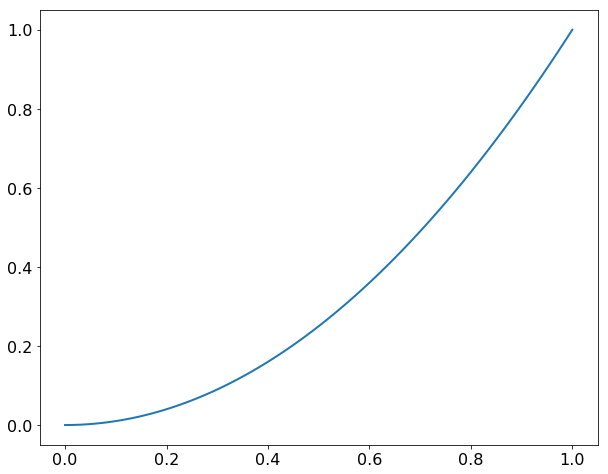

In [6]:
x = np.linspace(0, 1, 101) # 101 numbers from 0 to 1

plt.plot(x, x**2)

<a id=different_styles></a>
## Using different styles for plots

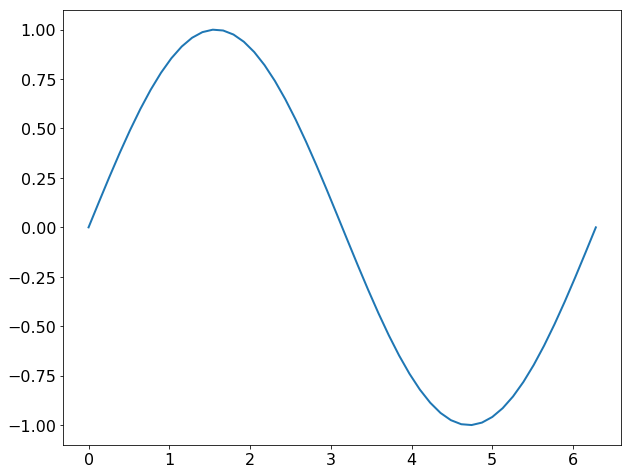

In [7]:
t = np.linspace(0, 2 * np.pi)   # 50 points between 0 and 2π
plt.plot(t, np.sin(t));

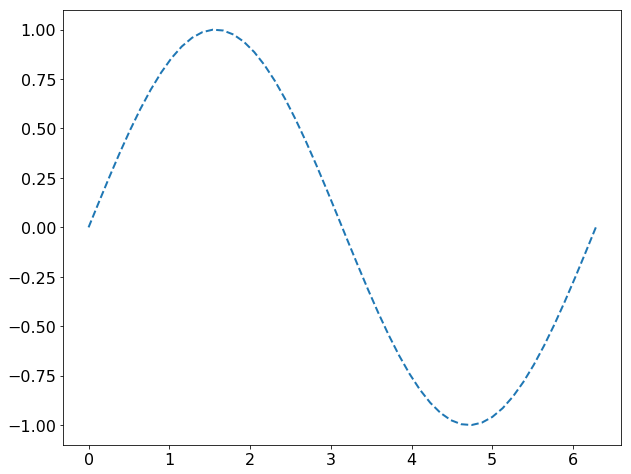

In [7]:
plt.plot(t, np.sin(t), '--');

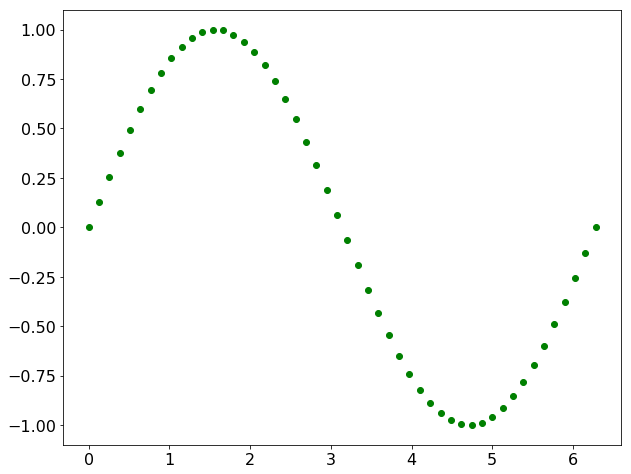

In [8]:
plt.plot(t, np.sin(t), 'go')
# plt.plot(t, np.sin(t), color='green', marker='o', linestyle='');   # same thing!

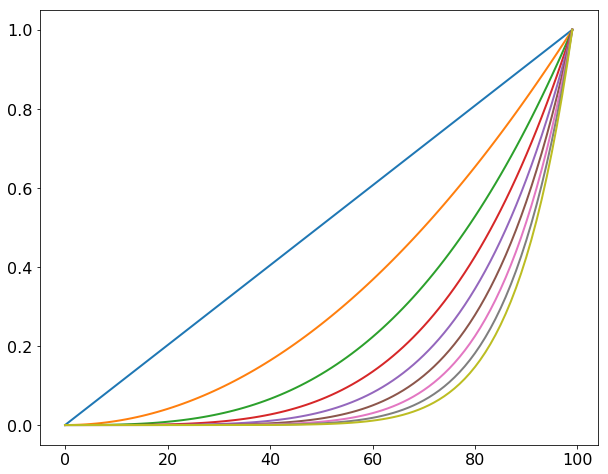

In [7]:
# new in matplotlib 2.0, all colors of the color rotation available as C<N>
# Multiple lines in the same plot
x = np.linspace(0, 1, 100)
for n in range(9):
    plt.plot(x**(n + 1), color='C{}'.format(n))

All styles and colors: [matplotlib.axes.Axes.plot](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)



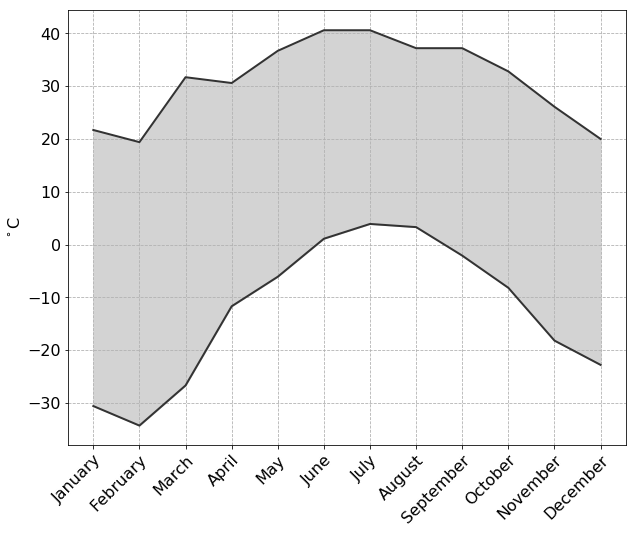

In [159]:
months = range(1, 13)
min_temp = np.array([-30.6, -34.3, -26.7, -11.7, -6.1, 1.1, 3.9, 3.3, -2.1, -8.2, -18.2, -22.8])
max_temp = np.array([21.7, 19.4, 31.7, 30.6, 36.7, 40.6, 40.6, 37.2, 37.2, 32.8, 26.1, 20.0])

plt.plot(months, min_temp, c='0.2')
plt.plot(months, max_temp, color='0.2')
plt.ylabel('$^\circ$C')

plt.fill_between(months, min_temp, max_temp, color='lightgray')
plt.grid(linestyle='--')

month_names = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.xticks(
    months,
    month_names,
    rotation=45,
    rotation_mode='anchor',
    horizontalalignment='right',  # or ha
    verticalalignment='top',      # or va
);

<a id=histograms></a>
# Histograms

<a id=histogram_1d></a>
## 1D

In [46]:
plt.hist?

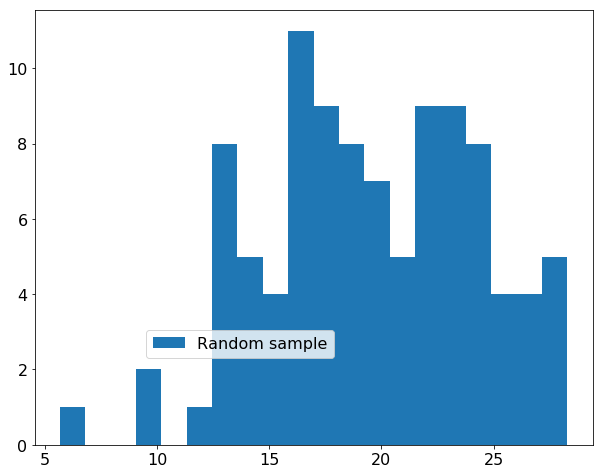

In [44]:
sample_size = 100
m = 20
s = 5
normal_sample = np.random.normal(m, s, sample_size)
#bins = np.linspace(0, 50, 101)
counts, bins, _ = plt.hist(normal_sample, bins=20, label='Random sample')
#plt.xlabel('Normally distributed variable?')
#plt.ylabel('Counts')
#plt.title('Normal distribution')

# Add a line plot to compare with expected distribution
#x = np.linspace(0, 40, 100)
#y = 1/np.sqrt(1*np.pi*s**2)*np.exp(-(x - m)**2/(2*s**2))*sample_size
#plt.plot(x, y) #, label=r'$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$')

# Add a legend
#plt.legend(loc='upper left')
#plt.legend(loc=(0.2, 0.2))

<a id=histogram_2d></a>
## 2D

In [45]:
plt.hist2d?

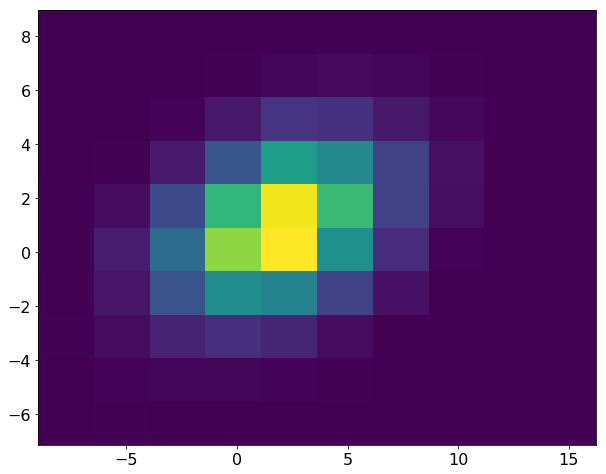

In [41]:
mean = [2, 1]
cov = [[9, 2],
       [2, 4]]

x, y = np.random.multivariate_normal(mean, cov, size=10000).T

hist_output = plt.hist2d(x, y)
#plt.hist2d(x, y, bins=50)
# plt.hist2d(x, y, bins=[25, 50], range=[[-10, 14], [-5, 7]])

#plt.colorbar(label='Counts');

# Bar plots

## Simple bar plot

In [12]:
plt.bar?

<BarContainer object of 20 artists>

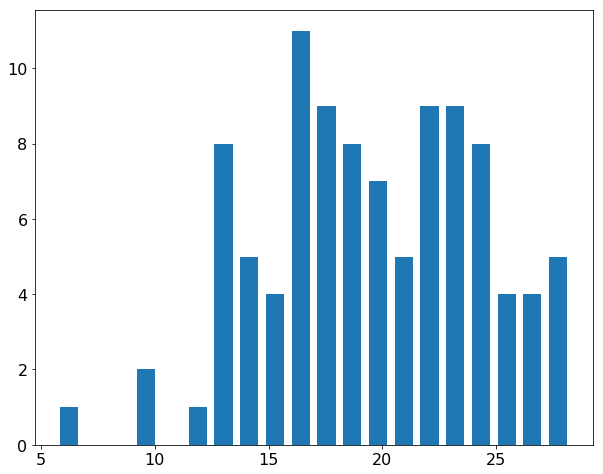

In [100]:
# Reusing the data from the 1D histogram
centers = (bins[:-1] + bins[1:])/2.
plt.bar(centers, counts)

# Not exactly the plot we had previously
# We have to set the width of the bar to the width of the bin
#bin_width = bins[1:] - bins[:-1]
#plt.bar(centers, counts, bin_width)

## Multiple bar plot

In [14]:
power_data = np.loadtxt('resources/power_sources.csv', delimiter=';', skiprows=1, usecols=range(1, 9))
power_headers = ['Hydroelectric',
 'Nuclear',
 'Coal',
 'Combined Cycle',
 'Wind',
 'Thermal',
 'Other non renewable',
 'Other renewable']
power_labels = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

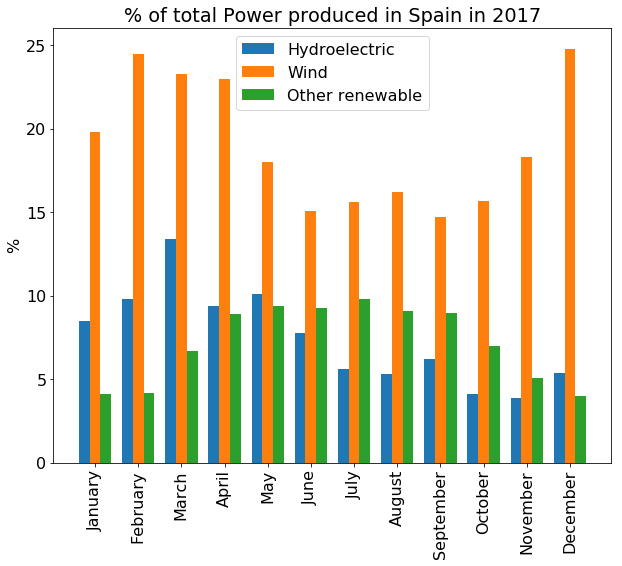

In [33]:
plt.bar(np.arange(1, 13) - 1/4., power_data[:, 0], width=1/4., label=power_headers[0])
plt.bar(np.arange(1, 13), power_data[:, 4], width=1/4., label=power_headers[4])
plt.bar(np.arange(1, 13) + 1/4., power_data[:, 7], width=1/4., label=power_headers[7])
plt.xticks(np.arange(1, 13), power_labels, rotation=90)
plt.title('% of total Power produced in Spain in 2017')
plt.ylabel('%')
plt.legend()

## Stacked bar plot

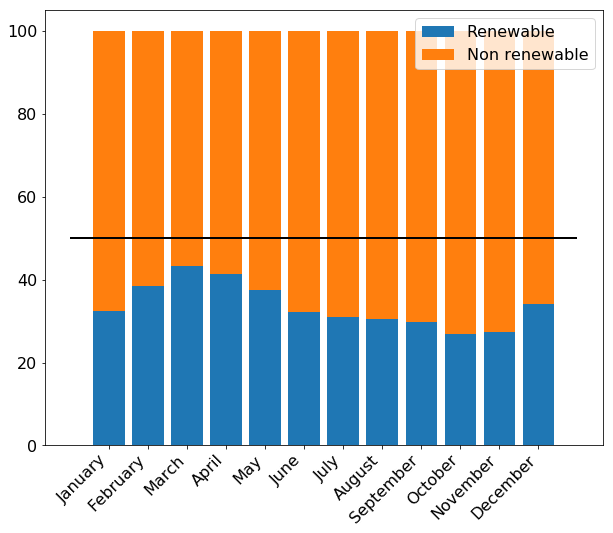

In [36]:
renewable = power_data[:, [0, 4, 7]].sum(axis=1) # Hydroelectric + Wind + Other renewable'
non_renewable = power_data[:, [1, 2, 3, 5, 6]].sum(axis=1) # Nuclear + Coal + Combined Cycle + Thermal + Other non renewable

plt.bar(range(1, 13), renewable, label='Renewable')
plt.bar(range(1, 13), non_renewable, bottom=renewable, label='Non renewable')

plt.xticks(range(1, 13), power_labels, rotation=45, ha='right')
plt.hlines(50, 0, 13)
plt.legend()

#plt.yticks([]);

# Scatter plots

In [50]:
plt.scatter?

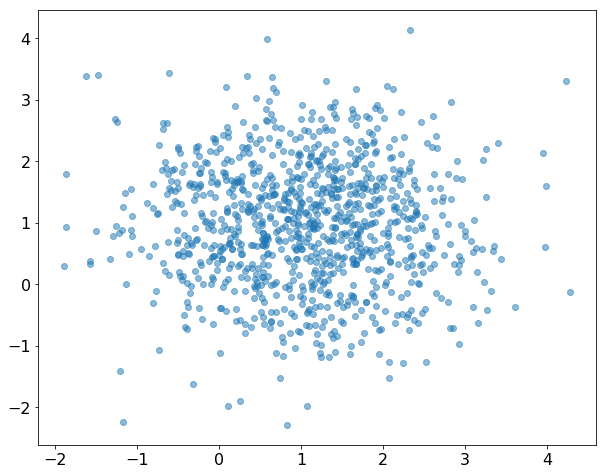

In [68]:
x1, y1, z1 = np.random.multivariate_normal([1, 1, 0], [[1, 0, 0], [0, 1, 0], [0, 0, 10]], 1000).T

# raw plot
plt.scatter(x1, y1, alpha=0.5)

# Coloured
#plt.scatter(x1, y1, c=z1, cmap='winter')
#plt.colorbar()

# With sizes
#plt.scatter(x1, y1, s=5*(z1 - min(z1)), alpha=0.5)

# Add another scatter
#x2, y2 = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], 1000).T
#plt.scatter(x2, y2, alpha=0.5)

# Add a grid
#plt.grid()
# And tune it!!
#plt.grid(alpha=0.2, linestyle='--', linewidth=2., color='0.2')

# The grid is bound to the ticks
#plt.xticks(np.arange(-4, 4.1))
#plt.yticks(np.arange(-4, 4.1));

# Set the limits of the plot
#plt.xlim([-2, 2])
#plt.ylim([-2, 2]);


# Exercise 1

Generate a line plot with the data of 3 random walks, corresponding to different random distributions.

With these characteristics:
* All lines in grey tones
* different markers or line types for each line
* with a legend located at the 'upper left'

**Hint:** Use the `np.cumsum` function to generate a random walk from a random sample.  

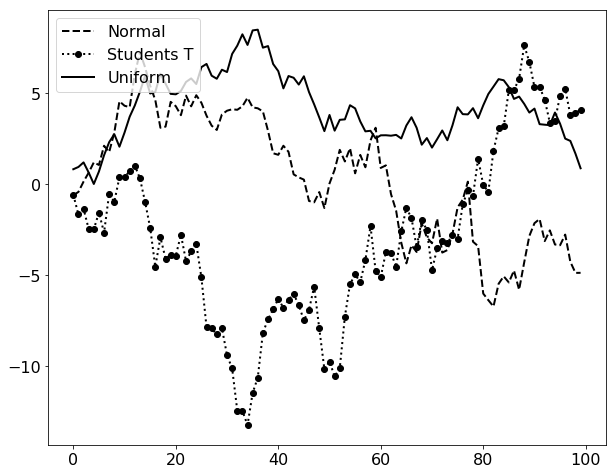

In [6]:
rw_1 = np.cumsum(np.random.normal(size=100), axis=0)
plt.plot(rw_1, '--k', label='Normal')

rw_2 = np.cumsum(np.random.standard_t(5, size=100), axis=0)
plt.plot(rw_2, ':ok', label='Students T')

rw_3 = np.cumsum(np.random.uniform(low=-1., high=1., size=100), axis=0)
plt.plot(rw_3, '-k', label='Uniform')

plt.legend(loc='upper left')

# matplotlib architecture

Up to this point, we have only used the so-called *state-machine interface*. It's a MATLAB-like interface implemented in the *pyplot* module that provides convenient methods for easy plotting. But it has some drawbacks:

* It's not very pythonic (python is OO)
* No idea what's happening in the background

This interface is OK for online plotting, because it's simple, but it is not convenient for other purposes, like embedding plots into a program. For all other purposes, the OO interface should be preferred. Using it, our code will be more verbose, but also more explanatory, and we'll have more control on what it's doing.


In order to introduce the OO API, it's convenient that we have some knowledge of matplotlib's architecture.

The top-level matplotlib object that contains and manages all of the elements in a given graphic is called the **Figure**.

To achieve the manipulation and rendering of this objects, matplotlib is structured in three layers:
* *Backend*: It's the one that actually draws the Artists on the canvas.
* *Artist Layer*: Are the things that have to be plotted. The figure, lines, axis, bars, ...
* *Scripting Layer (pyplot)*: Light scripting interface we have alredy shown


## Artists layer

Everything you see in a plot is an Artist instance. This layer is a hierarchy of objects with the **Figure** sitting on top of it.

<table><tr>
<td><img src="resources/artists_figure.png"></img></td>
<td><img src="resources/artists_tree.png"></img></td>
</tr>
</table>


Some more detail ([directly from the matplotlib documentation](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure))

### Figure
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes.

### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects.

The Axes class and it's member functions are the primary entry point to working with the OO interface.

### Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).

Figure(720x576)
    Rectangle(0,0;1x1)
    Axes(0.125,0.125;0.775x0.755)
        Line2D(_line0)
        Spine
        Spine
        Spine
        Spine
        XAxis(90.000000,72.000000)
            Text(0.5,3.2,'')
            Text(1,4.2,'')
        YAxis(90.000000,72.000000)
            Text(3.2,0.5,'')
            Text(0,467.08,'')
        Text(0.5,1,'')
        Text(0,1,'')
        Text(1,1,'')
        Rectangle(0,0;1x1)


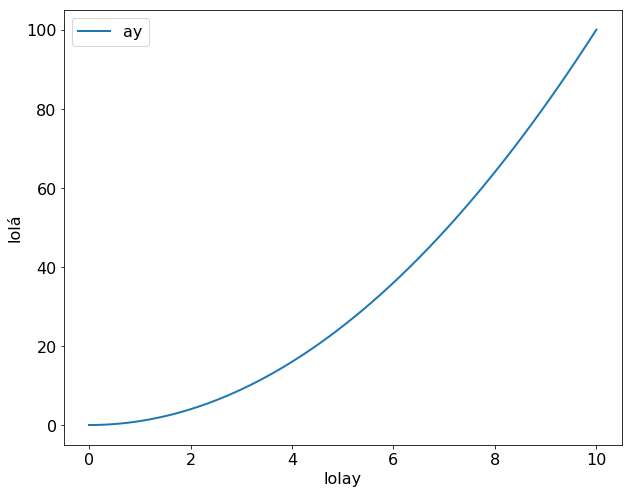

In [15]:
x = np.linspace(0, 10, 100)
y = x**2
plt.plot(x, y, label='ay')
plt.xlabel('lolay')
plt.ylabel('lolá')
plt.legend()

# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0, max_depth=8):
    if depth < max_depth and isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(fig)

Both APIs can be connected through the `pyplot.gcf` and `pyplot.gca` methods.

Is this the same? True



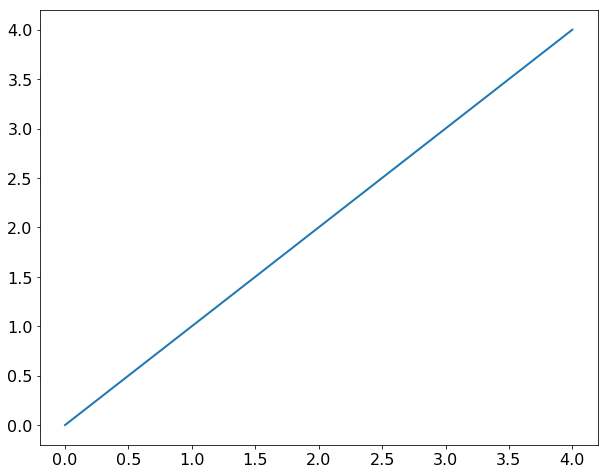

In [8]:
x = np.arange(5)
plt.plot(x, x)

fig = plt.gcf()
ax = plt.gca()
print('Is this the same? {}\n'.format(ax == fig.get_children()[1]))

When using the inline backend, the current figure is renderd in cell execution.

New cells will contain new figures.

This behaviour may be different with other backends.

In [14]:
new_fig = plt.gcf()
print('old figure exits and is a {}'.format(type(fig)))
print('new figure exits and is a {}'.format(type(new_fig)))
print('But are they the same instance? {}'.format(fig == new_fig))

old figure exits and is a <class 'matplotlib.figure.Figure'>
new figure exits and is a <class 'matplotlib.figure.Figure'>
But are they the same instance? False


<a id=multiple_plots></a>
## Multiple plots in the same figure

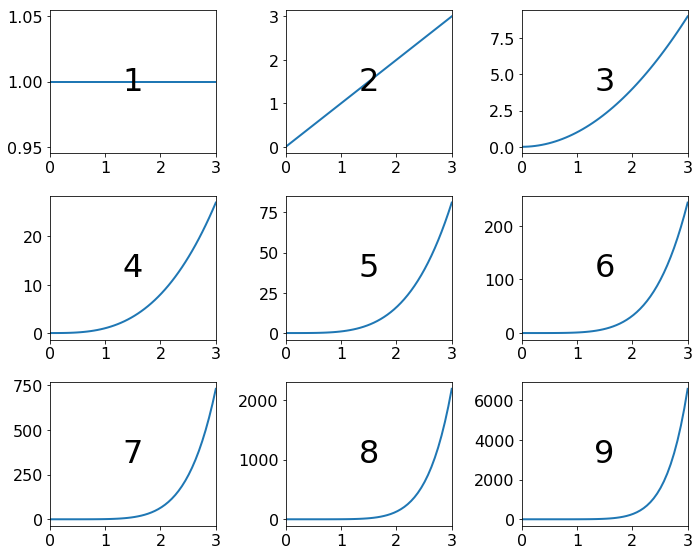

In [34]:
x = np.linspace(0, 3.)

# subplot arguments: # of rows, # of columns, plot index (row * (#cols) + col)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1) # the same as fig.add_subplot
    ax.plot(x, x**i)
    ax.set_xlim(0, 3)
    y_center = np.array(ax.get_ylim()).sum()/2.
    ax.text(1.5, y_center, str(i + 1), ha='center', va='center', fontsize=32)

plt.tight_layout() # When doing multiple plots you should almost always use this command

<a id=shared_axes></a>
### Shared Axes

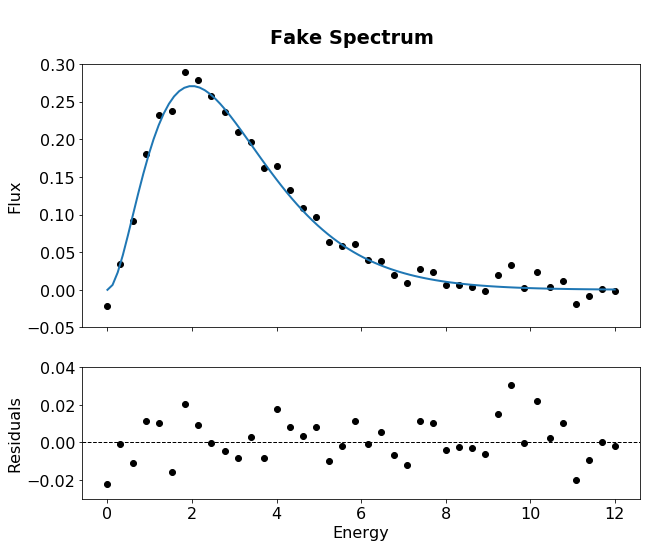

In [19]:
def poisson(x, k):
    return np.exp(-x)*x**k / np.math.factorial(k)

x = np.linspace(0, 12, 40)
y = poisson(x, 2)
y_noise = y + np.random.normal(0, 0.01, len(y))
z = np.linspace(0, 12, 100)

gridspec = {'height_ratios': [2, 1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(x, y_noise, 'ko')
ax1.plot(z, poisson(z, 2))
ax1.set_ylim(-0.05, 0.30)
ax1.set_ylabel('Flux')
#ax1.set_yticks(ax1.get_yticks()[1:])    # remove bottom y-tick

ax2.plot(x, y_noise - y, 'ko')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Energy')
ax2.set_ylim(-0.03, 0.04)
ax2.set_ylabel('Residuals')
#ax2.set_yticks(ax2.get_yticks()[:-2])   # remove top y-tick

#fig.subplots_adjust(hspace=0)
fig.suptitle('\nFake Spectrum', fontweight='bold');

## Using Gridspec

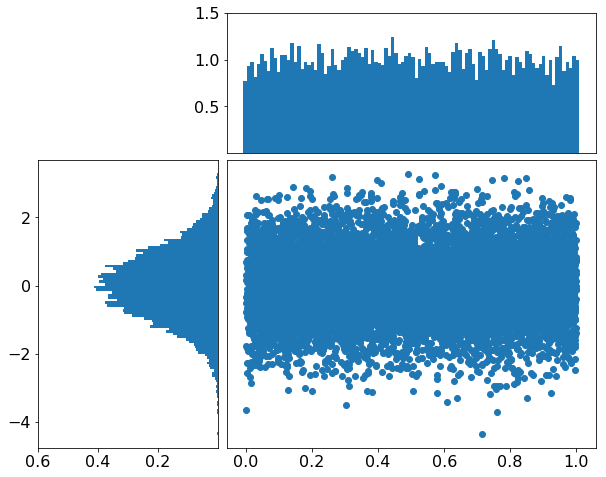

In [51]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

fig = plt.figure()
gspec = gridspec.GridSpec(3, 3) #, wspace=0.05, hspace=0.05)

top_histogram = fig.add_subplot(gspec[0, 1:])
side_histogram = fig.add_subplot(gspec[1:, 0])
lower_right = fig.add_subplot(gspec[1:, 1:])

# We produce two sets of random data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Normed histograms counts add up to 1, they resemble a probability density function
top_histogram.hist(X, bins=100, normed=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()
lower_right.scatter(X, Y)

# Remove the picks in-between
top_histogram.set_xticks([])
lower_right.set_yticks([])
top_histogram.set_yticks(top_histogram.get_yticks()[1:])
side_histogram.set_xticks(side_histogram.get_xticks()[1:])

<a id=inset_plots></a>
### Inset Plots (plot inside a plot)

In [ ]:
plt.plot(x, x**2)
plt.title("Outer Plot")

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)
plt.title("Inner Plot");

<a id=error_bars></a>
# Error bars

In [ ]:
x = np.linspace(0, 2*np.pi, 10)
errX = np.random.normal(0, 0.4, 10)
errY = np.random.normal(0, 0.4, 10)

plt.errorbar(x + errX, x + errY, xerr=0.4, yerr=errY, fmt='o');

<a id=asym_errors></a>
## Asymmetrical errors

Give 2 arrays to the `xerr` or `yerr` kwargs:


In [ ]:
x = np.linspace(0, 1, 10)
plt.errorbar(
    x, 
    np.sin(2 * np.pi * x),
    yerr=[np.full_like(x, 0.5), np.full_like(x, 0.1)],
    linestyle='',
    marker='o',
)

<a id=upper_limits></a>
## Upper and lower limits


Often, we want to give uncertainties for some values, but upper or lower limits for others.

In [ ]:
bins = np.logspace(2, 4, 15)
x = (bins[:-1] + bins[1:]) / 2

y = x**(-2.7)
yerr = y * 0.3
y += np.random.normal(0, yerr)

# mask for which points are upper limits
uplims = np.full_like(x, False)

# last points are only upper limits
y[-3:] += 3 * y[-3:]
yerr[-3:] = 0.3 * y[-3:] # yerr determines length of limit arrow
uplims[-3:] = True 

plt.errorbar(
    x,
    y,
    xerr=np.diff(bins/2),
    yerr=yerr,
    uplims=uplims,
    ls='none',
)

plt.xlabel('$E \ / \ \mathrm{GeV}$')
plt.ylabel('$Flux \ / \ \mathrm{GeV}^{-1} \mathrm{s}^{-1} \mathrm{m}^{-2} \mathrm{sr}^{-1}$')
plt.xscale('log')
plt.yscale('log')

<a id=polar_plots></a>
# Polar Plots

<BarContainer object of 101 artists>

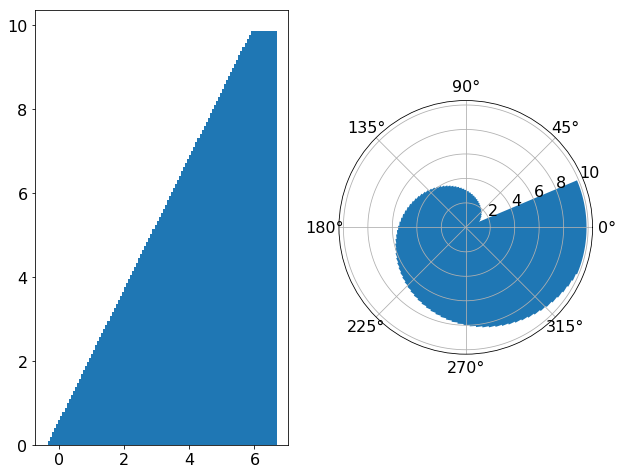

In [43]:
theta = np.linspace(0, 1*2*np.pi, 101)
r = theta/2*np.pi
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.bar(theta, r)
ax2 = fig.add_subplot(122, polar=True)
ax2.bar(theta, r)

In [ ]:
ax2.

In [33]:
theta

array([ 0.        ,  3.14159265,  6.28318531,  9.42477796, 12.56637061,
       15.70796327, 18.84955592, 21.99114858, 25.13274123, 28.27433388,
       31.41592654])

### Colormaps

* Can influence perception greatly
* Physicists most loved colormaps (rainbow, jet) objectively bad
    * Do not work when printed black/white
    * Not colorblind friendly
    * Not perceptually uniform
* Use the modern colormaps in matplotlib (available since 1.5)
    * `viridis` (default in 2.0)
    * `inferno`
    * `magma`
    * `plasma`
* Use fitting colormaps: sequential vs. diverging

More here: 
https://www.youtube.com/watch?v=xAoljeRJ3lU&t=6s

<a id=oo_syntax></a>
# Using the object orientated syntax

Matplotlib has two APIs (yes, it's strange).

* The matlab-like syntax we used until now:
    * Easier to write
    * Familiar for matlab users
    * Frequently uses global states
* Object-oriented syntax:
    * More powerful
    * More control over the plots
    * Preferable for library code
    * No (or at least very few) global states

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.pi, 1000)

fig, (ax1, ax2) = plt.subplots(2, 1)

# note that plot is now a method of ax1, not the global plt object
ax1.plot(t, np.sin(t), 'r-')
ax1.set_title(r"$f(t)=\sin(t)$")   # use object-oriented get/set syntax
ax1.set_xlabel("$t$")
ax1.set_xlim(0, 2*np.pi)
ax1.set_ylim(-1.1, 1.1)

ax2.plot(t, np.cos(t), 'b-')
ax2.set_title(r"$f(t)=\cos(t)$")
ax2.set_xlabel("$t$")
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1.1, 1.1)

fig.tight_layout()

<a id="mjd"></a>
# Providing both MJD and human readable date axis

* I am not able to convert MJD to normal date in my head
* Your audience probably is also not able to do it
* Solution: provide both a human readable and a MJD axis

Matplotlib uses the ordinal date (days since 1.1.1) for internal datetime representation

In [ ]:
from datetime import datetime, timedelta

# constants for ordinal and mjd date representation
MJD_EPOCH = datetime(1858, 11, 17)
ORDINAL_EPOCH = datetime(1, 1, 1)


def ordinal_to_mjd(ordinal):
    ''' Converts ordinal date (days since 0001-01-01T00:00) to MJD (days since 1858-11-17T00:00)'''
    return ordinal - (MJD_EPOCH - ORDINAL_EPOCH).total_seconds() / 86400


# create some random "Crab nebula" data
n_on = np.random.poisson(60, 25)
n_off = np.random.poisson(30, 25)
n_signal = n_on - 0.2 * n_off
n_signal_err = np.sqrt(n_on + 0.2**2 * n_off)

# create some dates
dates = [datetime(2017, 1, 1) + timedelta(days=i) for i in range(25)]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(dates, n_signal, yerr=n_signal_err, ls='')
ax.axhline(n_signal.mean(), color='C1')

ax.set_ylim(0, 80)
ax.set_ylabel(r'Signal Rate / $\mathrm{h}^{-1}$')


fig.autofmt_xdate()

# create a second axis, using the same y-axis
ax_mjd = ax.twiny()
# set its xlims to the same values of the date axis, but convert to mjd
ax_mjd.set_xlim(*map(ordinal_to_mjd, ax.get_xlim()))
ax_mjd.set_xlabel('MJD')

fig.tight_layout()

<a id=publication_plots></a>
## Plots for Publication

* Use fully blown LaTeX installation using the `pgf` backend
* Same font and font sizes as in your publication
* Really high quality, publication ready plots



<a id=plot_styles></a>
## Plot styles

List available styles:

In [ ]:
print(plt.style.available)

In [ ]:
from scipy import stats

def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.random.normal(0, 0.2, 10)
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot', 'seaborn']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

<a id=save_figures></a>
## Saving figures

Use `plt.savefig` to save your figure.

You can either give path relative to your working directory or an absolute path.
Not sure what the current working directory is?

In [ ]:
pwd()

In [ ]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")

# save in current directory; extension determines file type
plt.savefig('awesome_plot.pdf')
plt.savefig('awesome_plot.eps')
plt.savefig('awesome_plot.png', dpi=300)   # bitmap graphics; don't use me for publications!
plt.savefig('awesome_plot.jpg', dpi=300)   # bitmap graphics; don't use me either!

# relative path with subdirectory
# plt.savefig('build/awesome_plot.pdf')

# absolute path
# plt.saveig('/path/to/output/directory/awesome_plot.pdf')